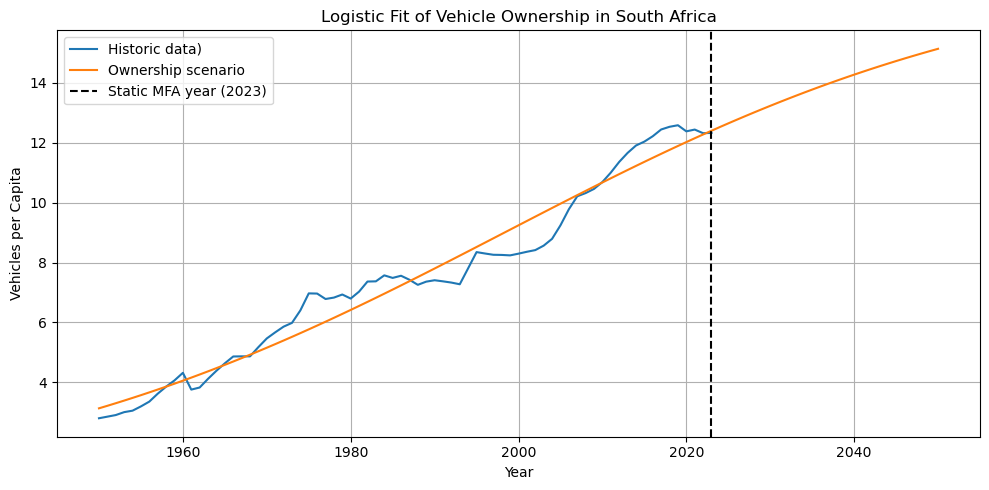

In [1]:
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Step 1: Load your VPC data (actual data only, up to 2023)
file_path = r"C:\Users\Akshi\OneDrive\Documents\MSC\ODYM-master\data\PC_Vehicles-in-use.xlsx"
vpc = pd.read_excel(file_path, sheet_name='VPC')

# Step 2: Clean and filter the data
vpc.dropna(subset=['Year', 'Vehicles'], inplace=True)
vpc['Year'] = vpc['Year'].astype(int)
vpc = vpc[vpc['Year'] <= 2023]  # Keep only actual historical data

# Step 3: Define the 4-parameter logistic function
def logistic(x, ti, tau, C0, C1):
    return (C1 - C0) / (1 + np.exp(-(x - ti) / tau)) + C0

# Step 4: Time range for projections
t_proj = np.arange(1950, 2051)  # Fit & forecast from 1950 to 2050

# Step 5: Fit logistic curve to observed data
# Provide realistic starting guess and bounds
initial_guess = [2000, 10, 2, 14]  # [ti, tau, C0, C1]
lower_bounds = [1950, 1, 0.0, 5.0]
upper_bounds = [2050, 100, 5.0, 18.0]

popt, pcov = curve_fit(
    logistic,
    vpc['Year'].values,
    vpc['Vehicles'].values,
    p0=initial_guess,
    bounds=(lower_bounds, upper_bounds)
)

# Step 6: Apply fitted curve to full time range
vpc_fit = logistic(t_proj, *popt)

# Step 7: Plot results
plt.figure(figsize=(10, 5))
plt.plot(vpc['Year'], vpc['Vehicles'], label='Historic data)')
plt.plot(t_proj, vpc_fit, '-', label='Ownership scenario')
plt.axvline(2023, color='k', linestyle='--', label='Static MFA year (2023)')
plt.xlabel('Year')
plt.ylabel('Vehicles per Capita')
plt.title('Logistic Fit of Vehicle Ownership in South Africa')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [2]:

# Optional: print the fitted parameters
print(f"Fitted logistic parameters:\nti = {popt[0]:.2f}, tau = {popt[1]:.2f}, C0 = {popt[2]:.2f}, C1 = {popt[3]:.2f}")

# Generate full year range and fitted VPC
years_full = np.arange(1950, 2051)
fitted_vpc_full = logistic(years_full, *popt)

# Create a dictionary of observed VPC for quick lookup
observed_dict = dict(zip(vpc['Year'].values, vpc['Vehicles'].values))

# Print table header
print(f"{'Year':<6} {'Historic':<14} {'Fitted'}")
print("-" * 40)

# Loop through full year range
for year, fit in zip(years_full, fitted_vpc_full):
    obs = observed_dict.get(year, None)
    obs_str = f"{obs:.2f}" if obs is not None else "—"
    print(f"{year:<6} {obs_str:<14} {fit:.2f}")


Fitted logistic parameters:
ti = 1998.31, tau = 31.03, C0 = 0.00, C1 = 18.00
Year   Historic       Fitted
----------------------------------------
1950   2.80           3.13
1951   2.86           3.22
1952   2.91           3.30
1953   3.01           3.39
1954   3.06           3.48
1955   3.20           3.57
1956   3.36           3.67
1957   3.62           3.76
1958   3.86           3.86
1959   4.07           3.96
1960   4.32           4.06
1961   3.76           4.16
1962   3.83           4.26
1963   4.12           4.37
1964   4.39           4.48
1965   4.64           4.59
1966   4.86           4.70
1967   4.87           4.81
1968   4.87           4.92
1969   5.18           5.04
1970   5.47           5.16
1971   5.67           5.28
1972   5.86           5.40
1973   5.99           5.52
1974   6.40           5.64
1975   6.97           5.77
1976   6.97           5.90
1977   6.78           6.03
1978   6.83           6.16
1979   6.93           6.29
1980   6.80           6.42
1981   7.03     

In [3]:
from sklearn.metrics import r2_score

# Predict values using your fitted model
y_pred = logistic(vpc['Year'].values, *popt)

# Calculate R²
r_squared = r2_score(vpc['Vehicles'].values, y_pred)

print(f"R² = {r_squared:.4f}")

R² = 0.9631


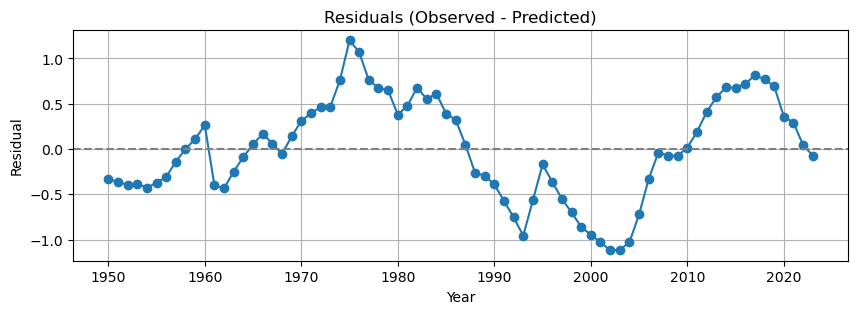

In [4]:
residuals = vpc['Vehicles'].values - y_pred
plt.figure(figsize=(10, 3))
plt.plot(vpc['Year'].values, residuals, 'o-')
plt.axhline(0, color='gray', linestyle='--')
plt.title('Residuals (Observed - Predicted)')
plt.xlabel('Year')
plt.ylabel('Residual')
plt.grid(True)
plt.show()

In [5]:
import pandas as pd

# Step 1: Load your VPC projection DataFrame
vpc_projection = pd.DataFrame({
    'Year': range(1950, 2051),
    'Vehicles_per_Capita': vpc_fit[0]  # Use the array from your logistic model
})

# Step 2: Define the full path to your existing Excel workbook
file_path = r"C:\Users\Akshi\OneDrive\Documents\MSC\ODYM-master\odym\modules\MSC_DMFA_StockDriven_SouthAfricaCarFleetData.xlsx"

# Step 3: Export the DataFrame to the 'VPC' sheet
with pd.ExcelWriter(file_path, engine='openpyxl', mode='a', if_sheet_exists='replace') as writer:
    vpc_projection.to_excel(writer, sheet_name='VPC', index=False)
